<a href="https://colab.research.google.com/github/No0bDarren/ADALL_github/blob/main/DT_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Target column: Price_SGD
MAE: 224.66
R²:  0.786


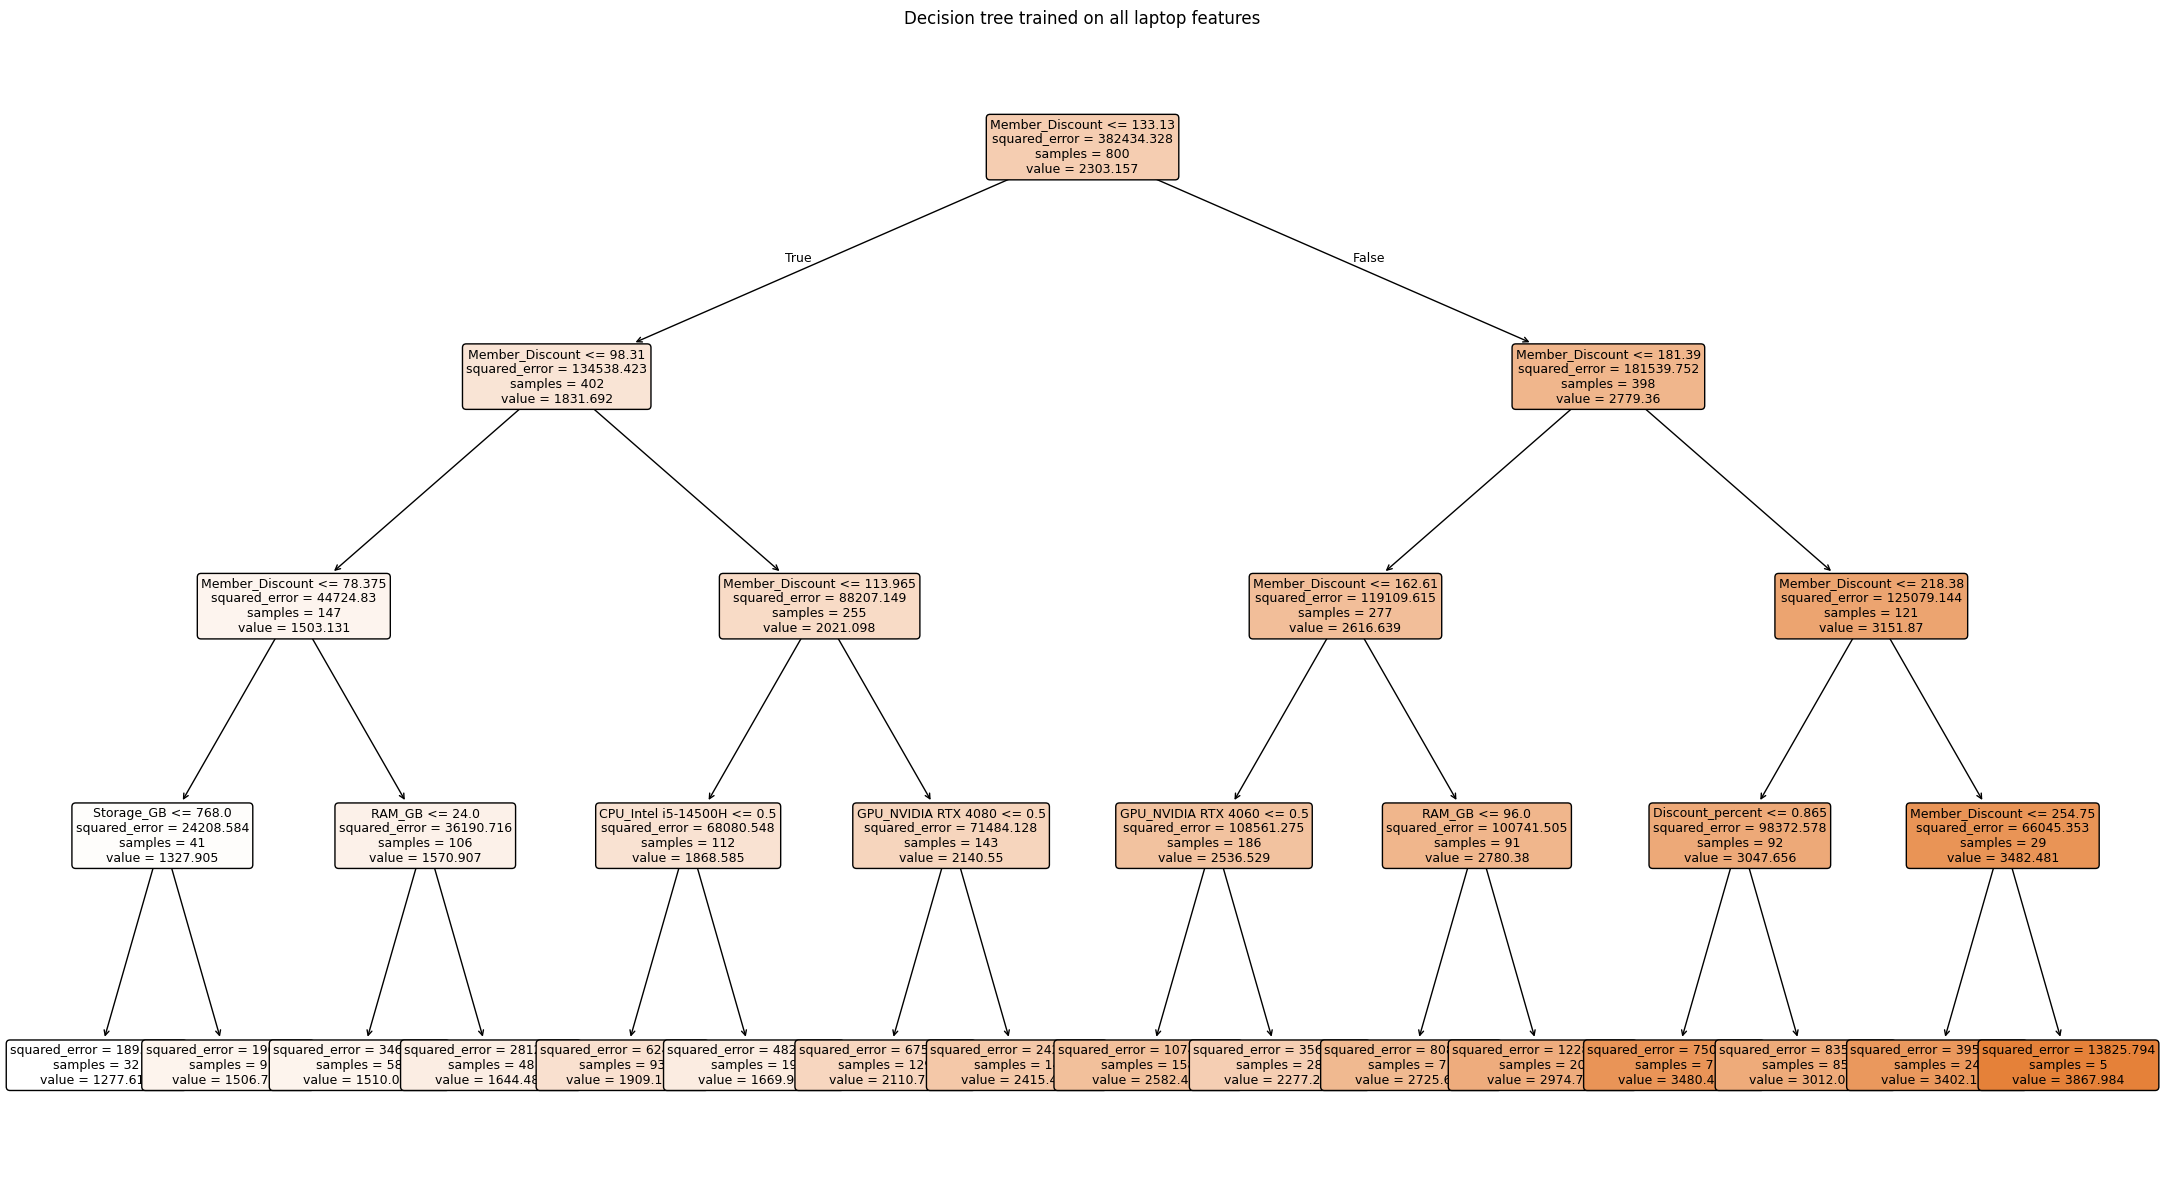

In [1]:
# Decision Tree model + tree plot (similar to the Iris example)
# Works even if your dataset has categorical columns (one-hot encodes them).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 1) Load data
url = "https://raw.githubusercontent.com/No0bDarren/ADALL_github/refs/heads/main/laptop_prices_2024_sgd_TL.csv"
df = pd.read_csv(url)

# 2) Pick target column (tries to find a column containing 'price', else uses last column)
price_cols = [c for c in df.columns if "price" in c.lower()]
target_col = price_cols[0] if price_cols else df.columns[-1]

# 3) Split X/y
X = df.drop(columns=[target_col])
y = df[target_col]

# 4) Build preprocessing: one-hot encode categoricals, pass through numerics
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
)

# 5) Decision Tree (for prices this is typically regression; adjust max_depth for readability)
tree = DecisionTreeRegressor(
    random_state=42,
    max_depth=4,          # increase (e.g., None) for full complexity; 3–5 is readable
    min_samples_leaf=5    # helps reduce overfitting / noisy splits
)

model = Pipeline(steps=[("preprocess", preprocess), ("tree", tree)])

# 6) Train/test split and fit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

# 7) Quick evaluation
pred = model.predict(X_test)
print(f"Target column: {target_col}")
print(f"MAE: {mean_absolute_error(y_test, pred):.2f}")
print(f"R²:  {r2_score(y_test, pred):.3f}")

# 8) Plot the trained tree (like the Iris plot)
# Get feature names after one-hot encoding
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = []
if len(cat_cols) > 0:
    cat_feature_names = ohe.get_feature_names_out(cat_cols).tolist()

feature_names = cat_feature_names + num_cols

plt.figure(figsize=(22, 12))
plot_tree(
    model.named_steps["tree"],
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision tree trained on all laptop features")
plt.tight_layout()
plt.show()
